<img src='ml_steps.jpeg'>

### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1:Gather Data

In [2]:
df = pd.read_csv('../datasets/Salary_Data.csv')
df.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
df.shape

(30, 2)

### Step 2: Prepare data

In [4]:
X = df["YearsExperience"].values
Y = df["Salary"].values

In [5]:
print(X.ndim)
X

1


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [7]:
X_updated = X.reshape(-1, 1)
Y_Updated = Y.reshape(-1, 1)
print(X_updated.ndim)
X_updated[:4]

2


array([[1.1],
       [1.3],
       [1.5],
       [2. ]])

- Split data into training and testing set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y_Updated,
                                               test_size=8,
                                               random_state=0)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(22, 1) (8, 1) (22, 1) (8, 1)


### Step 3: Train Model

- let's try to calculate m, b manually

In [10]:
def calculate(x,y):
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/
    ((np.mean(x)**2)-np.mean(x**2)))
    
    b = np.mean(y)-m*np.mean(x)
    
    return m,b

In [11]:
m,b=calculate(xtrain, ytrain)

In [12]:
print("Coeff: ", m)
print("Intercept:", b)

Coeff:  9379.710491946013
Intercept: 26986.691316737262


- Calculate parameters using sklearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [15]:
print("Coeff: ", lr.coef_)
print("Intercept:", lr.intercept_)

Coeff:  [[9379.71049195]]
Intercept: [26986.69131674]


### Step 4: Prediction

In [16]:
y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)

In [17]:
y_pred_test

array([[ 41056.25705466],
       [123597.70938378],
       [ 65443.50433372],
       [ 63567.56223533],
       [116093.94099022],
       [108590.17259667],
       [117031.91203942],
       [ 64505.53328452]])

In [18]:
xtest[0]

array([1.5])

In [19]:
xtest[0]*lr.coef_+lr.intercept_

array([[41056.25705466]])

In [20]:
xtest

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ]])

### Step 5: Evaluation

In [21]:
rs =pd.DataFrame({'Experience':xtest.flatten(),
             'Salary (Actual)':ytest.flatten(),
             'Salary (Predicted)':y_pred_test.flatten()})
rs.sort_values(by='Experience',inplace=True)
rs.set_index('Experience',inplace=True)
# rs.plot()
rs

Salary (Actual)  Salary (Predicted)
Experience                                     
1.5                 37731.0        41056.257055
3.9                 63218.0        63567.562235
4.0                 55794.0        64505.533285
4.1                 57081.0        65443.504334
8.7                109431.0       108590.172597
9.5                116969.0       116093.940990
9.6                112635.0       117031.912039
10.3               122391.0       123597.709384

In [22]:
rs.plot(kind='bar')

<AxesSubplot:xlabel='Experience'>

In [23]:
rs["Error"] = (rs.iloc[:,0]-rs.iloc[:,1])**2
rs.head()

Salary (Actual)  Salary (Predicted)         Error
Experience                                                   
1.5                 37731.0        41056.257055  1.105733e+07
3.9                 63218.0        63567.562235  1.221938e+05
4.0                 55794.0        64505.533285  7.589081e+07
4.1                 57081.0        65443.504334  6.993148e+07
8.7                109431.0       108590.172597  7.069907e+05

In [24]:
print(len(xtest))
print("SSE: ", rs.Error.sum())
print("MSE: ", rs.Error.sum()/len(xtest))

8
SSE:  179263521.1467255
MSE:  22407940.14334069


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mse = mean_squared_error(ytest, y_pred_test)
print(mse)

22407940.143340684


* Calculate r2 score

In [27]:
import numpy as np
a = np.array([10,20,30,40,50])
a-30

array([-20, -10,   0,  10,  20])

In [28]:
def sum_of_squars(y_original, y_mean_prd):
    return sum((y_original-y_mean_prd)**2)

def coeffient_of_determination(y_orig, y_line):
    y_mean = np.mean(y_orig)
    
    squared_error_regr = sum_of_squars(y_orig, y_line)
    squared_error_mean = sum_of_squars(y_orig, y_mean)
    
    r2_score = 1-(squared_error_regr/squared_error_mean)
    return r2_score

In [29]:
coeffient_of_determination(ytest, y_pred_test)

array([0.97792083])

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(ytest, y_pred_test)

0.9779208335417602

### Data Visualization

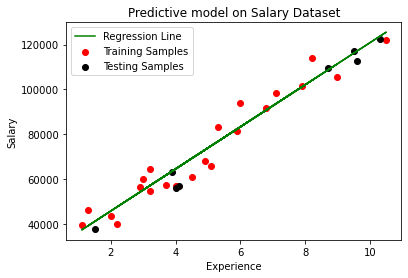

In [32]:
plt.scatter(xtrain,ytrain, color='red' ,label="Training Samples")
plt.scatter(xtest,ytest, color='black',label="Testing Samples")
plt.plot(xtrain, y_pred_train, color="green", label="Regression Line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Predictive model on Salary Dataset")
plt.legend()
plt.show()